In [0]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns


import requests
import io


plt.style.use('seaborn-whitegrid')

In [0]:
def load_timeseries(name,base_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'):
    url = f'{base_url}/time_series_19-covid-{name}.csv'
    csv = requests.get(url).text
    df = pd.read_csv(io.StringIO(csv), index_col=['Country/Region','Province/State','Lat','Long'])
    df['type'] = name.lower()
    df.columns.name = 'date'
    
    df = (df.set_index('type',append = True)
          .reset_index(['Lat','Long'],drop=True)
          .stack()
          .reset_index()
          .set_index('date')
      )
    
    df = preprocessing(df)
    
    df['date'] = df.index
    return df

In [0]:
def preprocessing(df):
    df.index = pd.to_datetime(df.index)
    df.columns = ['country','state','type','cases']
    
    #Moving Honkg Kong to Country
    
    df.loc[df.state == 'Hong Kong','country'] = 'Hong Kong'
    df.loc[df.state=='Hong Kong','state'] = np.nan
    
     # Aggregate large countries split by states
    df = pd.concat([df, 
                    (df.loc[~df.state.isna()]
                     .groupby(['country', 'date', 'type'])
                     .sum()
                     .rename(index=lambda x: x+' (total)', level=0)
                     .reset_index(level=['country', 'type']))
                   ])
    return df

In [0]:
df_confirmed = load_timeseries('Confirmed')

C:\Users\dipanjan.chowdhury\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [0]:
df_confirmed.head()

,cases,country,state,type,date
date,,,,,
2020-01-22,2,Thailand,NaN,confirmed,2020-01-22
2020-01-23,3,Thailand,NaN,confirmed,2020-01-23
2020-01-24,5,Thailand,NaN,confirmed,2020-01-24
2020-01-25,7,Thailand,NaN,confirmed,2020-01-25
2020-01-26,8,Thailand,NaN,confirmed,2020-01-26


In [0]:
df_confirmed.shape

(26264, 5)

In [0]:
ref_confirmed = df_confirmed.copy()
ref_confirmed = ref_confirmed.reset_index(drop = True)
ref_confirmed.head()

,cases,country,state,type,date
0,2,Thailand,NaN,confirmed,2020-01-22
1,3,Thailand,NaN,confirmed,2020-01-23
2,5,Thailand,NaN,confirmed,2020-01-24
3,7,Thailand,NaN,confirmed,2020-01-25
4,8,Thailand,NaN,confirmed,2020-01-26


In [0]:
print('Confirmed cases Min Date: ', ref['date'].min()) 
print('Confirmed cases Max Date: ', ref['date'].max()) 

Confirmed cases Min Date:  2020-01-22 00:00:00
Confirmed cases Max Date:  2020-03-17 00:00:00


In [0]:
df.columns

Index(['cases', 'country', 'state', 'type', 'date'], dtype='object')

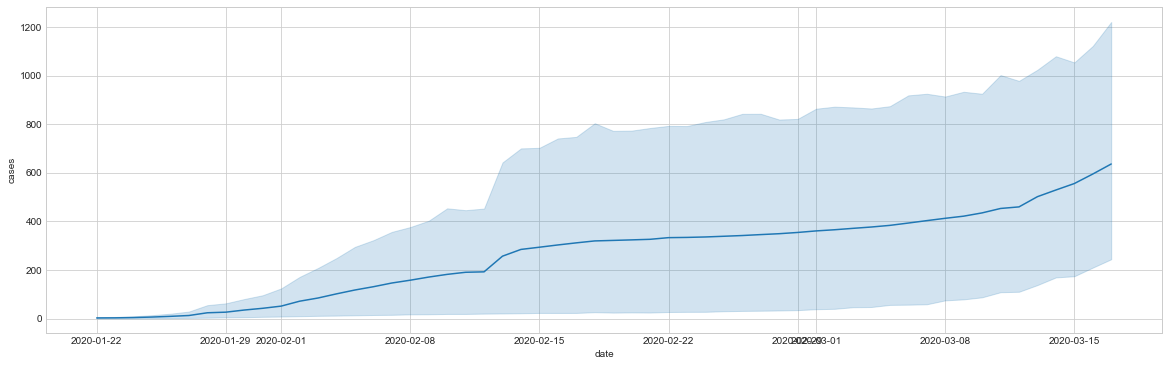

In [0]:
plt.figure(figsize=(20,6))
ax = sns.lineplot(x="date", y="cases", data=ref)
plt.show()

In [0]:
df_deaths = load_timeseries('Deaths')
df_deaths.head()

C:\Users\dipanjan.chowdhury\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


,cases,country,state,type,date
date,,,,,
2020-01-22,0,Thailand,NaN,deaths,2020-01-22
2020-01-23,0,Thailand,NaN,deaths,2020-01-23
2020-01-24,0,Thailand,NaN,deaths,2020-01-24
2020-01-25,0,Thailand,NaN,deaths,2020-01-25
2020-01-26,0,Thailand,NaN,deaths,2020-01-26


In [0]:
ref_deaths = df_deaths.copy()
ref_deaths = ref_deaths.reset_index(drop = True)
ref_deaths.head()

,cases,country,state,type,date
0,0,Thailand,NaN,deaths,2020-01-22
1,0,Thailand,NaN,deaths,2020-01-23
2,0,Thailand,NaN,deaths,2020-01-24
3,0,Thailand,NaN,deaths,2020-01-25
4,0,Thailand,NaN,deaths,2020-01-26


In [0]:
ref_deaths.shape

(26264, 5)

In [0]:
df_rec = load_timeseries('Recovered')
df_rec.head()

C:\Users\dipanjan.chowdhury\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


,cases,country,state,type,date
date,,,,,
2020-01-22,0,Thailand,NaN,recovered,2020-01-22
2020-01-23,0,Thailand,NaN,recovered,2020-01-23
2020-01-24,0,Thailand,NaN,recovered,2020-01-24
2020-01-25,0,Thailand,NaN,recovered,2020-01-25
2020-01-26,2,Thailand,NaN,recovered,2020-01-26


In [0]:
ref_rec = df_rec.copy()
ref_rec = ref_rec.reset_index(drop = True)
ref_rec.head()

,cases,country,state,type,date
0,0,Thailand,NaN,recovered,2020-01-22
1,0,Thailand,NaN,recovered,2020-01-23
2,0,Thailand,NaN,recovered,2020-01-24
3,0,Thailand,NaN,recovered,2020-01-25
4,2,Thailand,NaN,recovered,2020-01-26


In [0]:
ref_rec.shape

(26264, 5)

In [0]:
df = pd.concat([ref_confirmed,ref_deaths,ref_rec]).reset_index(drop=True)
df.head()

,cases,country,state,type,date
0,2,Thailand,NaN,confirmed,2020-01-22
1,3,Thailand,NaN,confirmed,2020-01-23
2,5,Thailand,NaN,confirmed,2020-01-24
3,7,Thailand,NaN,confirmed,2020-01-25
4,8,Thailand,NaN,confirmed,2020-01-26


In [0]:
df.shape

(78792, 5)

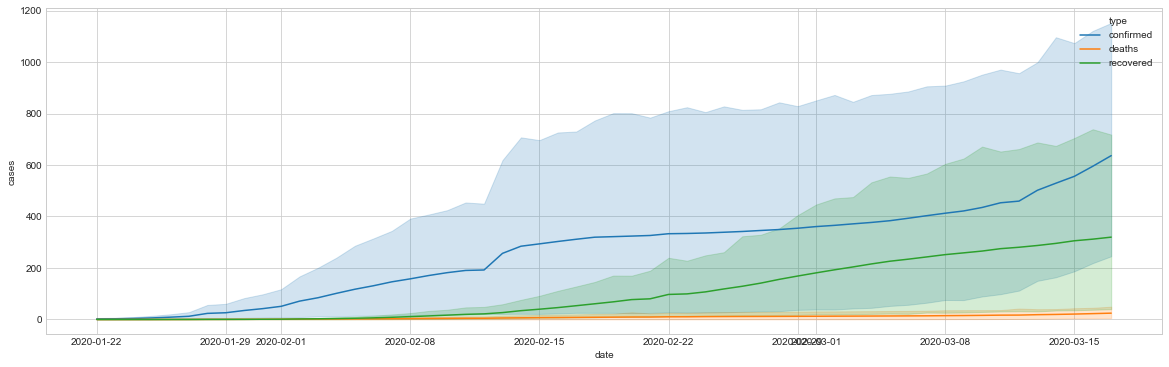

In [0]:
plt.figure(figsize=(20,6))
ax = sns.lineplot(x="date", y="cases",hue='type',data=df)
plt.show()

In [0]:
#type_based 
df.groupby('type').sum()

,cases
type,
confirmed,6982804
deaths,226409
recovered,2799799


In [0]:
#country based
df.groupby('country').sum()

,cases
country,
Afghanistan,119
Albania,273
Algeria,482
Andorra,60
Antigua and Barbuda,5
Argentina,347
Armenia,198
Aruba,11
Australia,3525
